# -- Tugas Praktikum - Week 04 --

## **1. Membuat Model Klasifikasi dengan menggunakan SVM**

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report

In [78]:
datafr = pd.read_csv('voice.csv')
datafr.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Pengecekan Dataset

In [79]:
datafr.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [80]:
datafr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [81]:
datafr.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

## Melakukan Encoding pada label dataset

In [82]:
le = LabelEncoder()
datafr['label'] = le.fit_transform(datafr['label'])
datafr.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


## Melakukan analisis korelasi dengan heatmap

In [83]:
correlation_matrix = datafr.corr()
correlation_with_target = correlation_matrix['label'].drop('label')  # Mengabaikan korelasi dengan dirinya sendiri

# Fitur-fitur dengan korelasi positif terbesar dengan variabel target
positive_correlation_features = correlation_with_target[correlation_with_target > 0.2]

# Fitur-fitur dengan korelasi negatif terbesar dengan variabel target
negative_correlation_features = correlation_with_target[correlation_with_target < 0.2]

print("Fitur dengan Korelasi Positif Terbesar:")
print(positive_correlation_features)

print("\nFitur dengan Korelasi Negatif Terbesar:")
print(negative_correlation_features)


Fitur dengan Korelasi Positif Terbesar:
sd        0.479539
IQR       0.618916
sp.ent    0.490552
sfm       0.357499
Name: label, dtype: float64

Fitur dengan Korelasi Negatif Terbesar:
meanfreq   -0.337415
median     -0.283919
Q25        -0.511455
Q75         0.066906
skew        0.036627
kurt        0.087195
mode       -0.171775
centroid   -0.337415
meanfun    -0.833921
minfun     -0.136692
maxfun     -0.166461
meandom    -0.191067
mindom     -0.194974
maxdom     -0.195657
dfrange    -0.192213
modindx     0.030801
Name: label, dtype: float64


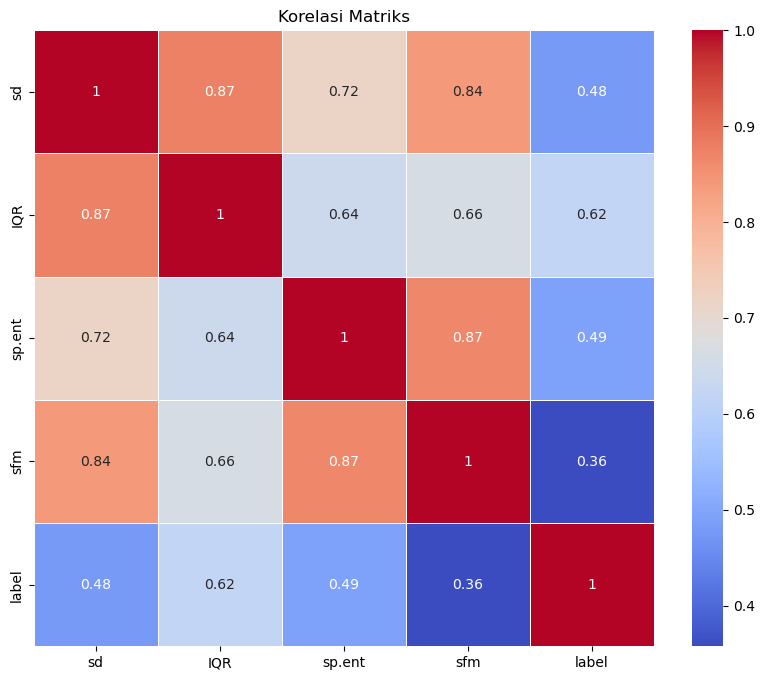

In [84]:
# menghitung matriks korelasi 
matrix_cor =  datafr[['sd','IQR','sp.ent','sfm', 'label']].corr()
# matrix_cor = datafr.corr()
# Membuat heatmap korelasi 
plt.figure(figsize=(10,8))
sns.heatmap(matrix_cor, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Matriks')
plt.show()

## Melakukan Pemisahan Antara Target dan Fitur

In [85]:
X = datafr[['sd','IQR','sp.ent','sfm']] 
y = datafr['label']
X.head()

,sd,IQR,sp.ent,sfm
0,0.064241,0.075122,0.893369,0.491918
1,0.067310,0.073252,0.892193,0.513724
2,0.083829,0.123207,0.846389,0.478905
3,0.072111,0.111374,0.963322,0.727232
4,0.079146,0.127325,0.971955,0.783568


In [86]:
# Splitting data training dan data testing dengan test_size = 0.2   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
# Scalling pada data fitur
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## Inisialisasi Model SVM dan training (fitting) data

In [88]:
# Pembuatan model SVM
svm_model = SVC(kernel='linear')

In [89]:
# Trainning Data
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

## Prediksi label pada data uji

In [90]:
y_pred = svm_model.predict(X_test)

In [91]:
# Evaluasi Model
acc_result = accuracy_score(y_test, y_pred) # akurasi
class_rep = classification_report(y_test, y_pred) # class report

In [92]:
print(f'Akurasi Skor : {acc_result}')

Akurasi Skor : 0.8943217665615142


**=> Jadi, akurasi Skor (approximate) : 89%**

## **2. Membuat  model klasfikasi Multinomial Naive Bayes**

Note : 
1. Menggunakan data spam.csv
2. Fitur CountVectorizer dengan mengaktifkan stop_words
3. Evaluasi hasilnya

## Membaca sumber dataset

In [93]:
datafr2 = pd.read_csv('spam.csv', encoding='latin-1')
datafr2.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Menghapus semua kolom yang tidak diperlukan
Pada data tersebut terdapat kolom-kolom yang bernilai Nan, maka kolom tersebut harus dihapus

In [94]:
datafr2 = datafr2.drop(datafr2.iloc[:,2:], axis=1)
datafr2.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Rename nama kolom

In [95]:
new_cols = {
    'v1': 'label',
    'v2': 'message'
}
datafr2 = datafr2.rename(columns=new_cols)
datafr2

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Encoding label

In [74]:
le = LabelEncoder()
datafr2['label'] = le.fit_transform(datafr2['label'])
datafr2

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [96]:
# Memasukkan data berdasar fitur dan label
X = datafr2['message']
y = datafr2['label']

### Splitting Data

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Splitting data training dan data testing dengan test_size = 0.2   

### Mendaftarkan Stop Words

In [129]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
# Download daftar stop words dalam bahasa Inggris jika belum terinstal
nltk.download('stopwords')
# daftar stop words dalam bahasa inggris
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Vektorisasi teks menggunakan CountVectorizer dengan penghapusan stop words

In [132]:
vtz = CountVectorizer(decode_error='ignore',stop_words='english')
X_train_vtz = vtz.fit_transform(X_train)
X_test_vtz = vtz.transform(X_test)

### Inisialisasi Model Multinomial Naive Bayes

In [133]:
from sklearn.naive_bayes import MultinomialNB
# inisialisasi model
nbclas_model = MultinomialNB() 
# fitting model 
nbclas_model.fit(X_train_vtz, y_train)

MultinomialNB()

### Prediksi label kelas pada data uji

In [134]:
y_pred = nbclas_model.predict(X_test_vtz)

### Evaluasi Model 

In [135]:
acc_result = accuracy_score(y_test, y_pred) # akurasi
print(f'Akurasi Skor : {acc_result}')

Akurasi Skor : 0.9838565022421525


**Evaluasi akurasi skor (approximate) : 99%**